[使用教程](https://blog.csdn.net/u011630575/article/details/79418138)

https://zhuanlan.zhihu.com/p/91817667?utm_source=wechat_session&utm_medium=social&utm_oi=26929503666176

[XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/index.html)

[libsvm数据格式](https://www.cnblogs.com/codingmengmeng/p/6254325.html)

目标值   第一维特征编号：第一维特征值   第二维特征编号：第二维特征值 …

In [2]:
# 导入必要的工具包
import xgboost as xgb

# 计算分类正确率
from sklearn.metrics import accuracy_score

In [5]:
# read in data，数据在xgboost安装的路径下的demo目录,现在我们将其copy到当前代码下的data目录
my_workpath = '../Dataset/Mushroom/'
dtrain = xgb.DMatrix(my_workpath + 'agaricus.txt.train')
dtest = xgb.DMatrix(my_workpath + 'agaricus.txt.test')

[08:20:45] 6513x127 matrix with 143286 entries loaded from ../Dataset/Mushroom/agaricus.txt.train
[08:20:45] 1611x127 matrix with 35442 entries loaded from ../Dataset/Mushroom/agaricus.txt.test


In [6]:
dtrain.num_col()

127

In [7]:
dtrain.num_row()

6513

In [9]:

# max_depth： 树的最大深度。缺省值为6，取值范围为：[1,∞]
# eta：为了防止过拟合，更新过程中用到的收缩步长。在每次提升计算之后，算法会直接获得新特征的权重。 
# eta通过缩减特征的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
# silent：取0时表示打印出运行时信息，取1时表示以缄默方式运行，不打印运行时信息。缺省值为0
# objective： 定义学习任务及相应的学习目标，“binary:logistic” 表示二分类的逻辑回归问题，输出为概率。

# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic' }
print(param)

{'max_depth': 2, 'eta': 1, 'silent': 0, 'objective': 'binary:logistic'}


In [11]:
# 设置boosting迭代计算次数
num_round = 2
 
%time bst = xgb.train(param, dtrain, num_round) #  dtrain是训练数据集
 

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 24.4 ms


In [12]:
train_preds = bst.predict(dtrain)
train_predictions = [round(value) for value in train_preds]
y_train = dtrain.get_label() #值为输入数据的第一行
train_accuracy = accuracy_score(y_train, train_predictions)
print ("Train Accuary: %.2f%%" % (train_accuracy * 100.0))

Train Accuary: 97.77%


In [14]:
# make prediction
preds = bst.predict(dtest)
predictions = [round(value) for value in preds]
y_test = dtest.get_label()
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))

Test Accuracy: 97.83%


#### 模型可视化
调用XGBoost工具包中的plot_tree
要可视化模型需要安装graphviz软件包
plot_tree（）的三个参数：
1. 模型
2. 树的索引，从0开始
3. 显示方向，缺省为竖直，‘LR'是水平方向

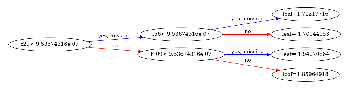

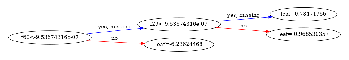

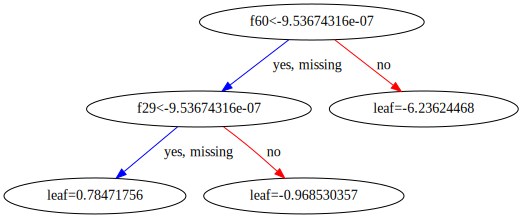

In [17]:
from matplotlib import pyplot
import graphviz
xgb.plot_tree(bst, num_trees=0, rankdir= 'LR' )
# pyplot.show()

xgb.plot_tree(bst,num_trees=1, rankdir= 'LR' )
pyplot.show()
xgb.to_graphviz(bst,num_trees=0)
xgb.to_graphviz(bst,num_trees=1)